# This is the Juypter Notebook containing simulations for Theorem 4 in the paper "Networked Competitive Bivirus SIS Model - Analysis of the Discrete-Time Case"

In [583]:
import bivirus
import numpy as np
import importlib
importlib.reload(bivirus)

<module 'bivirus' from '/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py'>

The Following Simulations demonstrates the stability of the endemic equilibria $(\bar{x}^1, 0)$ when  
$\rho(I - h D^2 + (I - \bar{X}^1)B^2) \leq 1$

In [584]:
def path_graph_adjacency(n, W = 1):
    A = np.zeros((n, n))
    for i in range(n - 1):
        A[i, i + 1] = np.random.uniform(0, W)
        A[i + 1, i] = np.random.uniform(0, W)
    return A

In [585]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, threshold=1.5, W=2, iterations=10000, tolerance=1e-6)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
B1_raw, B2_raw = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
# Set all values in A below 'threshold' to zero
B1_thres = np.where(B1_raw < config.threshold, 0, B1_raw)
B2_thres = np.where(B2_raw < config.threshold, 0, B2_raw)

# add the path graph adjacency matrix to ensure strong connectivity
B1 = B1_thres + path_graph_adjacency(config.N, W=config.W/10)
B2 = B2_thres + path_graph_adjacency(config.N, W=config.W/10)
B = [B1, B2]
delta = [
    1e-5 * np.ones(config.N),
    0.2 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[1.50050961 1.88605606 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.56211491
  1.67562643 0.        ]
 [0.19991683 1.79269898 0.1711156  0.         1.89839503 1.75372476
  0.         0.         1.61642985 1.98947965 0.         0.
  0.         0.         0.         1.91290717 0.         1.82915066
  0.         0.        ]
 [0.         0.15255302 0.         1.81391791 0.         0.
  0.         1.85324135 0.         0.         0.         0.
  0.         1.63046893 1.52575372 1.52771313 0.         0.
  1.50982707 0.        ]
 [0.         1.73389734 1.95187889 0.         0.1062009  1.69746892
  0.         0.         1.89525712 0.         0.         0.
  1.64720756 0.         1.99329845 0.         0.         0.
  0.         1.520101  ]
 [0.         0.         0.         0.05966601 0.         1.88022167
  0.         0.         1.8831194  1.91327549 1.6035491  0.
  0.         

In [586]:
# check assumptions of the theorems 2 and 3
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))

Assumptions of theorems:
spectral radius 1 is 1.008595429785137
spectral radius 2 is 1.0089991492504418
Theorem 2 satisfied: False
Theorem 3: 0


The two code blocks below represent two different initialization strategies for the same model(i.e., same network, same parameters)

All assumptions satisfied
x_bar Converged at iteration 2251
x1_bar is: [0.9999978  0.99999924 0.999999   0.9999992  0.99999905 0.99999831
 0.99999821 0.99999894 0.9999984  0.99999929 0.99998458 0.99974312
 0.99997424 0.99998063 0.99999882 0.99999892 0.99999831 0.99999918
 0.99999426 0.99999823]
x_bar Converged at iteration 2251
x1_bar_avg is: 0.9999828867147723
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875
 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875]
Reached max iterations and did not converge
spectral radius 1 is 1.008595429785137
spectral radius 2 is 1.0089991492504418
x_bar Converged at iteration 2251
x_bar Converged at iteration 3683
det radius 1 is 0.9999057117895885
det radius 2 is 1.2047479343561438
This experiment satisfies Theorem:  4.2
All assumptions satisfied
x_bar Converged at iteration 2251
x1_bar is: [0.999

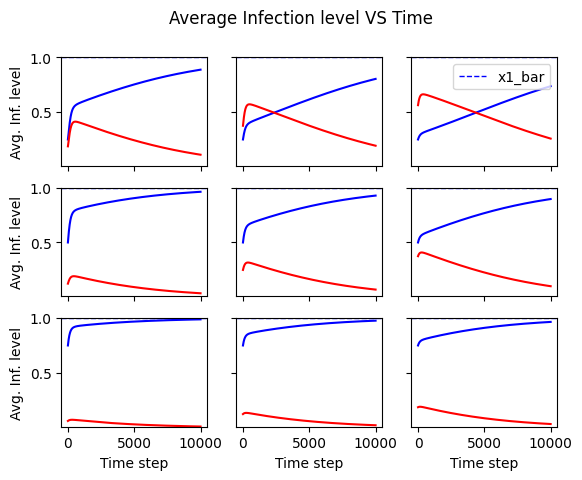

In [587]:
# initialization logic to test starting states covering "a large portion of \mathcal D"
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for num1 in [0.25, 0.50, 0.75]:
    num2bound = 1 - num1
    num2list = [num2bound * (i + 1) / 4 for i in range(3)]
    for num2 in num2list:

        x1.fill(num1)
        x2.fill(num2)
        bivirus.check_basic_assumptions(x1, x2, B, delta, config)
        x1_bar = bivirus.x_bar(x1, B1, delta[0], config)
        print("x1_bar is:", x1_bar)
        x1_bar_avg = np.mean(bivirus.x_bar(x1, B1, delta[0], config))
        print("x1_bar_avg is:", x1_bar_avg)
        print('x1 is '+str(x1))
        print('x2 is ' + str(x2))
        results = bivirus.run_simulation(x1, x2, B, delta, config)
        print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(x1, x2, B, delta, config))

        x1_histories.append(results["x1_history"])
        x2_histories.append(results["x2_history"])
        x1_avg_histories.append(results["x1_avg_history"])
        x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear', x1_bar_avg=x1_bar_avg)

All assumptions satisfied
Reached max iterations and did not converge
spectral radius 1 is 1.008595429785137
spectral radius 2 is 1.0089991492504418
x_bar Converged at iteration 2073
x_bar Converged at iteration 3138
det radius 1 is 0.9998442451586897
det radius 2 is 1.2047479267798187
This experiment satisfies Theorem:  4.2
All assumptions satisfied
Reached max iterations and did not converge
spectral radius 1 is 1.008595429785137
spectral radius 2 is 1.0089991492504418
x_bar Converged at iteration 2011
x_bar Converged at iteration 3763
det radius 1 is 0.9999538395726095
det radius 2 is 1.2047478740318
This experiment satisfies Theorem:  4.2
All assumptions satisfied
Reached max iterations and did not converge
spectral radius 1 is 1.008595429785137
spectral radius 2 is 1.0089991492504418
x_bar Converged at iteration 2231
x_bar Converged at iteration 3663
det radius 1 is 0.9998899023788983
det radius 2 is 1.2047478295372533
This experiment satisfies Theorem:  4.2
All assumptions satisf

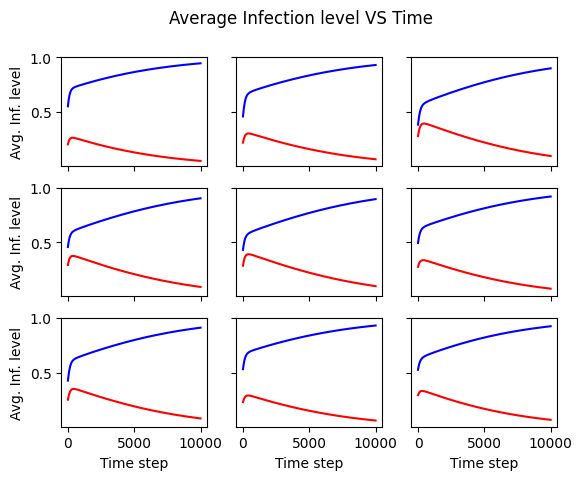

In [588]:
# Completely random initializations
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

for i in range(9):
    x1 = np.random.uniform(0, 1, config.N)
    x2 = np.random.uniform(0, 1 - x1, config.N)
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)
    print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(x1, x2, B, delta, config))
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')

The Following Simluations demonstrates the unstability of the endemic equilibria $(\bar{x}^1, 0)$ when  
$\rho(I - hD^2 + (I - \bar{X}^1)B^2) > 1$

In [589]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, W=0.5, iterations=10000, tolerance=1e-4)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
B1, B2 = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
# B1, B2 = np.round(B1, 2), np.round(B2, 2)

B = [B1, B2]
delta = [
    1 * np.ones(config.N),
    1 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[0.3751274  0.42252373 0.20128587 0.17467228 0.32160502 0.08289713
  0.22224124 0.06756518 0.19099649 0.2738589  0.21188745 0.03612253
  0.03872828 0.27130289 0.15989252 0.35146187 0.25771809 0.39052873
  0.41890661 0.25899246]
 [0.24073376 0.44817474 0.03490557 0.10983307 0.47459876 0.43843119
  0.14193125 0.07331393 0.40410746 0.49736991 0.08433846 0.01124724
  0.04606262 0.07932609 0.22876339 0.47822679 0.0525655  0.45728766
  0.31777189 0.28542781]
 [0.24931478 0.29186982 0.27453013 0.45215412 0.31699776 0.35671279
  0.0813211  0.46331034 0.27509277 0.24552886 0.35944465 0.2204415
  0.05691065 0.40761723 0.38143843 0.38192828 0.22535924 0.2745854
  0.37745677 0.31549729]
 [0.0055188  0.43347433 0.44484959 0.06040182 0.35386909 0.42436723
  0.09863665 0.24996231 0.47381428 0.13630889 0.18596879 0.36269028
  0.41180189 0.27984381 0.49832461 0.06215164 0.16392833 0.10033629
  0.28820013 0.38002525]
 [0.23260674 0.24566719 0.09222087 0.32960125 0.02445267 0.46249622
  0.1665684

In [590]:
# check assumptions of the theorems 2 and 3
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))

Assumptions of theorems:
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
Theorem 2 satisfied: False
Theorem 3: 0


The two code blocks below represent two different initialization strategies for the same model(i.e., same network, same parameters)

All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875
 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875]
Main loop Converged at iteration 1065
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1488
x_bar Converged at iteration 1557
det radius 1 is 2.055564597677411
det radius 2 is 2.0197332836459077
This experiment satisfies Theorem:  4.4
All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375
 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375]
Main loop Converged at iteration 874
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1488
x_bar Co

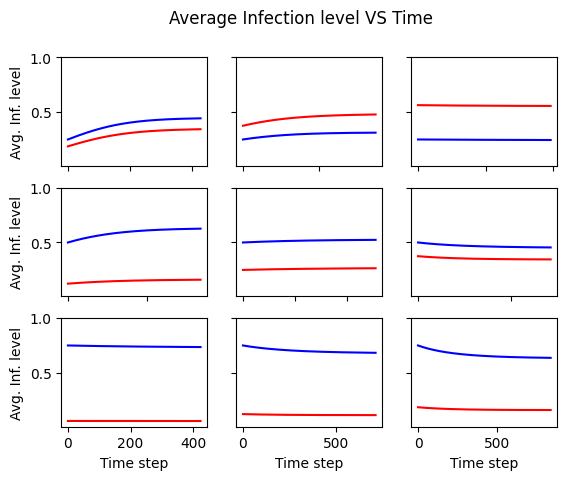

In [591]:
# initialization logic to test starting states covering "a large portion of \mathcal D"
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for num1 in [0.25, 0.50, 0.75]:
    num2bound = 1 - num1
    num2list = [num2bound * (i + 1) / 4 for i in range(3)]
    for num2 in num2list:

        x1.fill(num1)
        x2.fill(num2)
        bivirus.check_basic_assumptions(x1, x2, B, delta, config)

        print('x1 is '+str(x1))
        print('x2 is ' + str(x2))
        results = bivirus.run_simulation(x1, x2, B, delta, config)
        print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(x1, x2, B, delta, config))

        x1_histories.append(results["x1_history"])
        x2_histories.append(results["x2_history"])
        x1_avg_histories.append(results["x1_avg_history"])
        x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')

All assumptions satisfied
Main loop Converged at iteration 2169
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1132
x_bar Converged at iteration 1566
det radius 1 is 2.0528776922258523
det radius 2 is 2.0195540459571553
This experiment satisfies Theorem:  4.4
All assumptions satisfied
Main loop Converged at iteration 2112
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1153
x_bar Converged at iteration 1433
det radius 1 is 2.053891940135987
det radius 2 is 2.0196802989823825
This experiment satisfies Theorem:  4.4
All assumptions satisfied
Main loop Converged at iteration 2168
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1021
x_bar Converged at iteration 1606
det radius 1 is 2.0510121769688494
det radius 2 is 2.0196086016085446
This experiment satisfies Theorem:  4.4
All assumptions satisfied
Main loop Co

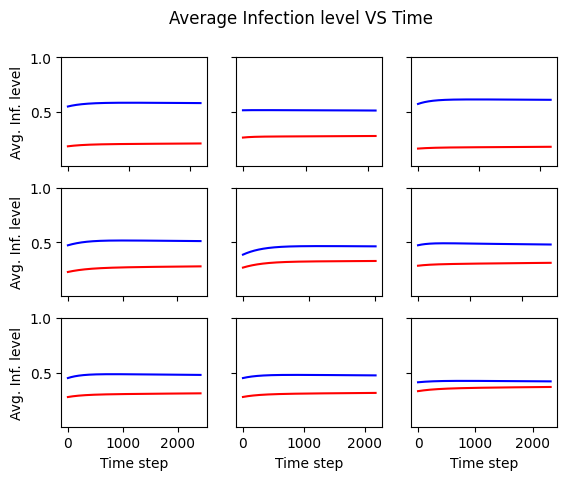

In [592]:
# Completely random initializations
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

for i in range(9):
    x1 = np.random.uniform(0, 1, config.N)
    x2 = np.random.uniform(0, 1 - x1, config.N)
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)
    print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(x1, x2, B, delta, config))
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')